# <center>FINAL PROJECT: International Football After War II<center>

# *Team Information

| FULL NAME             | ID NUMBER |
| :-----------          |     :----:|
| Nguyễn Thiện Hoàng Trí| 20127088  |
| Nguyễn Phước Gia Huy  | 20127038  |


---

## 1. Introduction

### 1.1. Data information

This dataset includes 44,341 results of international football matches starting from the very first official match in 1872 up to 2022. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

The data is gathered from several sources including but not limited to Wikipedia, rsssf.com, and individual football associations' websites.

### 1.2. Attribute information

- `results.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `home_score` - full-time home team score including extra time, not including penalty-shootouts
    - `away_score` - full-time away team score including extra time, not including penalty-shootouts
    - `tournament` - the name of the tournament
    - `city` - the name of the city/town/administrative unit where the match was played
    - `country` - the name of the country where the match was played
    - `neutral` - TRUE/FALSE column indicating whether the match was played at a neutral venue
- `shootouts.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `winner` - winner of the penalty-shootout
- `goalscorers.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `team` - name of the team scoring the goal
    - `scorer` - name of the player scoring the goal
    - `own_goal` - whether the goal was an own-goal
    - `penalty` - whether the goal was a penalty
    
#### NOTE:
Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

### 1.3. Why we select this dataset?
Currently, World Cup 2022 has been received a great deal of public concern over the world. Also both of us are a big fan of this tournament so we decide to explore and analyze more about dataset about football events. After selecting carefully on Kaggle, we find that this dataset ([here](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv)) has enough information we need for our project.

## 2. Data Exploration

### IMPORT

In [1]:
# import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
fbmatches_df = pd.read_csv("results.csv")
scorers_df = pd.read_csv("goalscorers.csv")
penalty_df = pd.read_csv("shootouts.csv")

In [3]:
scorers_df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


### How many rows and columns in dataset?
Use pandas to find the number of rows and columns and store in 2 lists `num_rows` and `num_cols`.

In [4]:
RC={}
num_rows=[]
num_cols=[]

num_rows.append(fbmatches_df.shape[0])
num_rows.append(scorers_df.shape[0])
num_rows.append(penalty_df.shape[0])

num_cols.append(fbmatches_df.shape[1])
num_cols.append(scorers_df.shape[1])
num_cols.append(penalty_df.shape[1])

RC['num_rows']=num_rows
RC['num_cols']=num_cols

RC_df=pd.DataFrame(RC,index=['fbmatches_df','scorers_df','penalty_df'])
RC_df

,num_rows,num_cols
fbmatches_df,44353,9
scorers_df,41008,8
penalty_df,547,4


### What is the meaning of each row? Are there any 2 rows with different meaning?
According to data description of the course and by taking a quick look at the data, each line provides information about a match. It seems that there is no outlier line.

### Is the data duplicated?
We going to check that if the value of variable is 1 , the data is duplicated and vice versa

In [5]:
#results.csv
fbmatches_df.index.duplicated().sum() 

0

In [6]:
#goalscorers.csv
scorers_df.index.duplicated().sum() 

0

In [7]:
#shootouts.csv
penalty_df.index.duplicated().sum()

0

### What is the current data type of each column? Are there columns having inappropriate data types?

We  check the datatype (`dtype`) of each element in a column in `fbmatches_df`,`scorers_df`,`penalty_df` and store the results in a series named `col_dtypes`. The index of this series is the name of the columns.

In [8]:
col_dtypes=fbmatches_df.dtypes
col_dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [9]:
col_dtypes=scorers_df.dtypes
col_dtypes

date          object
home_team     object
away_team     object
team          object
scorer        object
minute       float64
own_goal        bool
penalty         bool
dtype: object

In [10]:
col_dtypes=penalty_df.dtypes
col_dtypes


date         object
home_team    object
away_team    object
winner       object
dtype: object

All the columns have the suitable datatype.

### With each numerical column, how are values distributed?
It looks like that the datatype of columns are numeric. According to this approach, there will be 4 numeric columns ("home_score", "away_score" , "minute" and "date").

In [11]:
fbmatches_df['date']=pd.to_datetime(fbmatches_df['date'],format="%Y-%m-%d")
scorers_df['date']=pd.to_datetime(scorers_df['date'],format="%Y-%m-%d")
penalty_df['date']=pd.to_datetime(penalty_df['date'],format="%Y-%m-%d")

In [12]:
max_=[]
min_=[]
missing_val=[]

max_.append(max(fbmatches_df['date']))
max_.append(max(fbmatches_df['home_score']))
max_.append(max(fbmatches_df['away_score']))
max_.append(max(scorers_df['minute']))

min_.append(min(fbmatches_df['date']))
min_.append(min(fbmatches_df['home_score']))
min_.append(min(fbmatches_df['away_score']))
min_.append(min(scorers_df['minute']))

missing_val.append(fbmatches_df[fbmatches_df['date'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(fbmatches_df[fbmatches_df['home_score'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(fbmatches_df[fbmatches_df['away_score'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(scorers_df[scorers_df['minute'].isna()].shape[0]/scorers_df.shape[0] *100)

new_number_df=pd.DataFrame(columns=['Max','Min','Missing values'])
new_number_df['Max']=max_
new_number_df['Min']=min_
new_number_df['Missing values']=missing_val

new_number_df.index = ['date','home_score', 'away_score','minute']


new_number_df

,Max,Min,Missing values
date,2022-12-18 00:00:00,1872-11-30 00:00:00,0.000000
home_score,31,0,0.000000
away_score,21,0,0.000000
minute,122.0,1.0,0.629146


### How does the categorical data distribute? 
For each of categorical column, compute the percentage of missing values, number of different values (missing values are not counted), a list of different values (missing values are not counted) and store them into a dataframe named cate_col_profiles_df. 

Categorical data of `fbmatches_df`:

In [13]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','tournament','city','country'])

cate_col_profiles_df.loc['missing_ratio']=fbmatches_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(fbmatches_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=fbmatches_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=fbmatches_df['home_team'].dropna().unique()
new_list['away_team']=fbmatches_df['away_team'].dropna().unique()
new_list['tournament']=fbmatches_df['tournament'].dropna().unique()
new_list['city']=fbmatches_df['city'].dropna().unique()
new_list['country']=fbmatches_df['country'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,tournament,city,country
missing_ratio,0.0,0.0,0.0,0.0,0.0
num_diff_vals,311.0,306.0,141.0,2010.0,267.0
diff_vals,"[Scotland, England, Wales, Northern Ireland, U...","[England, Scotland, Wales, Northern Ireland, C...","[Friendly, British Home Championship, Évence C...","[Glasgow, London, Wrexham, Blackburn, Belfast,...","[Scotland, England, Wales, Ireland, United Sta..."


Categorical data of `scorers_df`:

In [14]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','team','scorer'])

cate_col_profiles_df.loc['missing_ratio']=scorers_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(scorers_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=scorers_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=scorers_df['home_team'].dropna().unique()
new_list['away_team']=scorers_df['away_team'].dropna().unique()
new_list['team']=scorers_df['team'].dropna().unique()
new_list['scorer']=scorers_df['scorer'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,team,scorer
missing_ratio,0.0,0.0,0.0,0.119489
num_diff_vals,220.0,220.0,220.0,13376.0
diff_vals,"[Chile, Argentina, Brazil, Uruguay, Paraguay, ...","[Uruguay, Chile, Brazil, Argentina, Paraguay, ...","[Uruguay, Argentina, Chile, Brazil, Paraguay, ...","[José Piendibene, Isabelino Gradín, Alberto Oh..."


Categorical data of `penalty_df`:

In [15]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','winner'])

cate_col_profiles_df.loc['missing_ratio']=penalty_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(penalty_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=penalty_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=penalty_df['home_team'].dropna().unique()
new_list['away_team']=penalty_df['away_team'].dropna().unique()
new_list['winner']=penalty_df['winner'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,winner
missing_ratio,0.0,0.0,0.0
num_diff_vals,162.0,172.0,159.0
diff_vals,"[India, South Korea, Thailand, Senegal, Guinea...","[Taiwan, Vietnam Republic, Iraq, South Korea, ...","[Taiwan, South Korea, Iraq, Thailand, Ghana, G..."


## 3. Preprocessing

### Drop every matches which were unofficial and after War II
We found that friendly matches were not suitable for us to explore so we decided to drop those rows.

In [16]:
#fbmatches_df = fbmatches_df[fbmatches_df['tournament'] != 'Friendly']
#fbmatches_df=fbmatches_df.reset_index(drop=True)
fbmatches_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True
44351,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False


In [17]:
# fbmatches_df = fbmatches_df[fbmatches_df['date'].dt.year >= 1945]
# scorers_df =scorers_df[scorers_df['date'].dt.year  >= 1945]
# penalty_df =penalty_df[penalty_df['date'].dt.year  >= 1945]
# fbmatches_df['home_team'].iloc[31849] = 'South Africa'
# fbmatches_df['away_team'].iloc[31849] = 'Zimbabwe'
# fbmatches_df['home_team'].iloc[40795] = 'Uganda'
# fbmatches_df['away_team'].iloc[40795] = 'South Africa'

### Add column `score_status` to dataframe

We need the information of match status that illustrate the winner of the match to answer a question. Therefore, before analyzing data to answer questions, you should preprocess by adding column "score_status" to `fbmatches_df`.

In [18]:
fbmatches_df['score_status']=np.select([fbmatches_df['home_score']>fbmatches_df['away_score'],
                                 fbmatches_df['home_score']<fbmatches_df['away_score'],
                                 fbmatches_df['home_score']==fbmatches_df['away_score']],['H','A','D'])
fbmatches_df['team winner'] = fbmatches_df.apply(lambda x : x['home_team'] if x['home_score'] > x['away_score'] 
                                              else (x['away_team'] if x['home_score'] < x['away_score'] else np.nan),
                                              axis=1)
fbmatches_df['year']=pd.DatetimeIndex(fbmatches_df['date']).year
fbmatches_df['decade']=fbmatches_df['year'] - fbmatches_df['year'] %10
fbmatches_df['month'] = pd.DatetimeIndex(fbmatches_df['date']).month_name()
fbmatches_df['day of Week'] = pd.DatetimeIndex(fbmatches_df['date']).day_name()

In [19]:
fbmatches_df=fbmatches_df.reset_index(drop=True)
scorers_df=scorers_df.reset_index(drop=True)
penalty_df=penalty_df.reset_index(drop=True)

In [20]:
football_df=pd.merge(fbmatches_df,penalty_df,how='left',on=['date','home_team','away_team'])
football_df['team winner']=football_df.apply(lambda x : x['winner'] 
                                             if not pd.isnull(x['winner']) and  pd.isnull(x['team winner']) else x['team winner'],axis=1)
football_df.drop(columns=['winner'],inplace=True)

football_df['away_team'] = football_df['away_team'].replace(['Vietnam Republic'], 'Vietnam')
football_df['away_team'] = football_df['away_team'].replace(['Yemen DPR'], 'Yemen')
football_df['home_team'] = football_df['home_team'].replace(['Vietnam Republic'], 'Vietnam')
football_df['home_team'] = football_df['home_team'].replace(['Yemen DPR'], 'Yemen')
football_df['away_team'] = football_df['away_team'].replace(['German DR'], 'Germany')
football_df['home_team'] = football_df['home_team'].replace(['German DR'], 'Germany')


#football_df[~football_df['winner'].isnull()]
football_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_status,team winner,year,decade,month,day of Week
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,NaN,1872,1870,November,Saturday
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,H,England,1873,1870,March,Saturday
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,H,Scotland,1874,1870,March,Saturday
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,D,NaN,1875,1870,March,Saturday
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,H,Scotland,1876,1870,March,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False,A,Taiwan,2022,2020,December,Wednesday
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False,H,Vietnam,2022,2020,December,Wednesday
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,H,Croatia,2022,2020,December,Saturday
44351,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False,H,Singapore,2022,2020,December,Saturday


## 4. Data analyzing to answer questions

### How has football been adopted over time?
In order to answer this question, we should perform 2 steps:
- Step 1: Slip `fbmatches_df` to 5 dataframe corresponding to 5 continents in over the world: `AFC`, `CONMEBOL`, `UEFA`, `CAF`, and `CONCACAF` based on leagues or tournaments occured for each continents
- Step 2: 

In [21]:
# Những năm đầu tiên được chơi bóng
AFC_df = fbmatches_df[(fbmatches_df['tournament'].str.contains('AFC',case=False)) & (fbmatches_df["tournament"].str.contains("NAFC") == False)]
CONMEBOL_df = fbmatches_df[fbmatches_df['tournament'].str.contains('COPA América',case=False)]
UEFA_df = fbmatches_df[fbmatches_df['tournament'].str.contains('UEFA',case=False) & (fbmatches_df["tournament"].str.contains("CONMEBOL") == False)]
CAF_df = fbmatches_df[fbmatches_df['tournament'].str.contains('African ',case=False) & (fbmatches_df["tournament"].str.contains("West") == False)]
CONCACAF_df =fbmatches_df[fbmatches_df['tournament'].str.contains('CONCACAF',case=False)]

AFC_df=AFC_df.reset_index(drop=True) # Asian
CONMEBOL_df=CONMEBOL_df.reset_index(drop=True) # South America
UEFA_df=UEFA_df.reset_index(drop=True) # European
CAF_df=CAF_df.reset_index(drop=True) # Africa
CONCACAF_df=CONCACAF_df.reset_index(drop=True) # North America


CAF_df= CAF_df[CAF_df['away_team'] != 'Guadeloupe' ]
CAF_df= CAF_df[CAF_df['away_team'] != 'French Guiana']
CAF_df= CAF_df[CAF_df['away_team'] != 'New Caledonia']
CAF_df= CAF_df[CAF_df['away_team'] != 'Mayotte']
CAF_df= CAF_df[CAF_df['away_team'] != 'Tahiti']
CAF_df= CAF_df[CAF_df['away_team'] != 'Saint Pierre and Miquelon']

CAF_df= CAF_df[CAF_df['home_team'] != 'Guadeloupe' ]
CAF_df= CAF_df[CAF_df['home_team'] != 'French Guiana']
CAF_df= CAF_df[CAF_df['home_team'] != 'New Caledonia']
CAF_df= CAF_df[CAF_df['home_team'] != 'Mayotte']
CAF_df= CAF_df[CAF_df['home_team'] != 'Tahiti']

AFC= list(AFC_df['away_team'].sort_values().unique())
CAF= list(CAF_df['away_team'].sort_values().unique())
UEFA= list(UEFA_df['away_team'].sort_values().unique())
CONCACAF= list(CONCACAF_df['away_team'].sort_values().unique())
CONMEBOL= ['Argentina' ,'Bolivia' ,'Brazil' ,'Chile' ,'Colombia' ,'Ecuador' ,'Paraguay' ,'Peru' ,'Uruguay','Venezuela']
OFC = ['American Samoa' ,'Cook Islands' ,'Fiji' ,'Kiribati' ,'New Caledonia' ,'New Zealand' 
          ,' Niue' ,'Papua New Guinea' ,'Samoa','Solomon Islands','Tahiti','Tonga','Tuvalu','Vanuatu']

Countries_df = pd.DataFrame({
    'Team': AFC + CAF  + CONCACAF + CONMEBOL + OFC + UEFA,
    'Confederation' : ['AFC'] * len(AFC) + ['CAF'] * len(CAF) + ['CONCACAF'] * len(CONCACAF) + ['CONMEBOL'] * len(CONMEBOL) + ['OFC'] * len(OFC) + ['UEFA'] * len(UEFA),
    'Region' : ['Asia'] * len(AFC) + ['Africa'] * len(CAF) + ['North and Central America'] * len(CONCACAF) + ['South America'] * len(CONMEBOL) + ['Oceania'] * len(OFC) + ['Europe'] * len(UEFA),
})

Teams=list(football_df['home_team'].unique()) + list(football_df['away_team'].unique())
FT_Teams_df=pd.DataFrame({'Team': list(set(Teams))})
FT_Teams_df['First year']=FT_Teams_df['Team'].apply(lambda x : football_df[(football_df['home_team']==x) | (football_df['away_team']==x)]['year'].values[0])
FT_Teams_df['First decade']=FT_Teams_df['First year']-FT_Teams_df['First year']%10
FT_Teams_df=FT_Teams_df.merge(Countries_df,how='left',on=['Team'])
FT_Teams_df.sort_values(by='First year',inplace=True)

- AFC - Asian Football Confederation - `47 members` - founded in 1954, represents Asian nations in football. The main tournament is the AFC Asian Cup. ( But in this data AFC has `49 members`. Therefore, Israel join  UEFA member in 1994 and Kazakhstan join UEFA member in 2002)
- CAF - Confédération Africaine de Football - `54 members` - founded in 1957 - represents African nations in football. The main tournament is the African Cup of Nations.
- CONCACAF - Confederation of North, Central American and Caribbean Association Football - `41 members` - founded in 1961 represents North American, Central American and Caribbean nations. The main tournament is the CONCACAF Gold Cup.
- CONMEBOL - Confederación Sudamericana de Fútbol - `10 members` - founded in 1916 represents South American nations in football. The main tournament is the Copa América.
- OFC - Oceania Football Confederation - `11 members` - founded in 1966 represents Oceanian nations in football. The main tournament is the OFC Nations Cup.
- UEFA Union of European Football Associations - `55 members` - founded in 1954 represents European nations in football. The main tournament is the UEFA European Championship, also known as UEFA Euro.

In [22]:
new_teams_decade_region_df= FT_Teams_df.groupby(['First decade','Region']).size().unstack('Region')

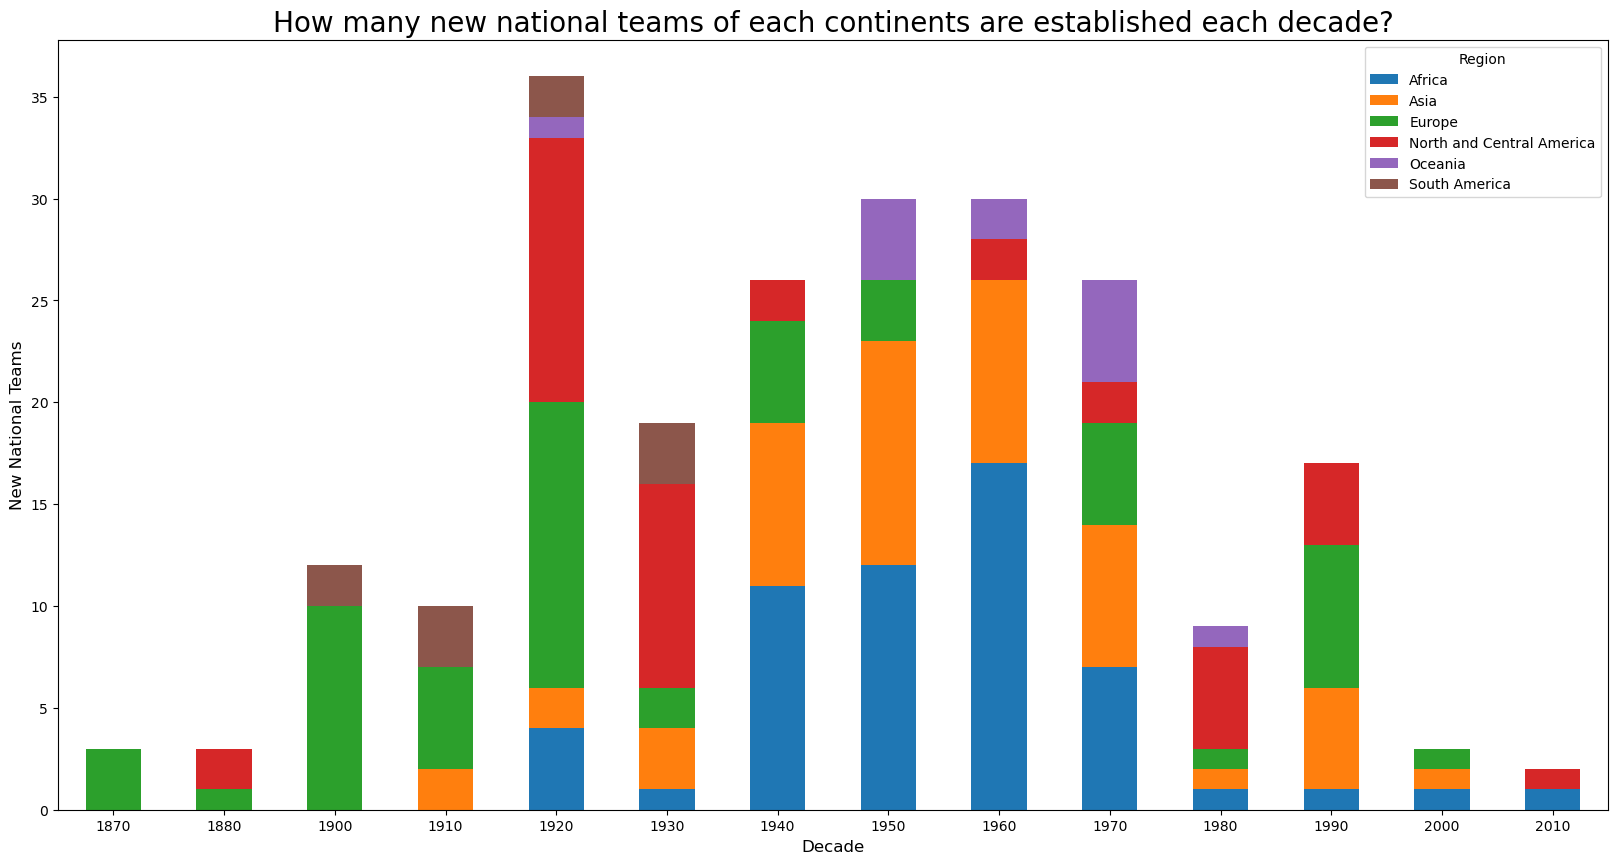

In [23]:
ax = new_teams_decade_region_df.plot(kind='bar', stacked=True, figsize=(20,10));
ax.set_title('How many new national teams of each continents are established each decade?', size=20)
ax.set_xlabel(xlabel='Decade', size=12)
ax.set_ylabel(ylabel='New National Teams', size=12)
plt.xticks(rotation=0);

In [24]:
football_df = football_df[football_df['tournament'] != 'Friendly']
football_df=football_df.reset_index(drop=True)
Tournament_df=pd.DataFrame({'tournament': list(football_df['tournament'].unique())})
Tournament_df['Total match']= Tournament_df['tournament'].apply(lambda x: len(football_df[(football_df['tournament']==x) & (~football_df['tournament'].str.contains('qualification',case=False))]))
top10_tournament_df=Tournament_df.sort_values(by='Total match', ascending=False).head(10)

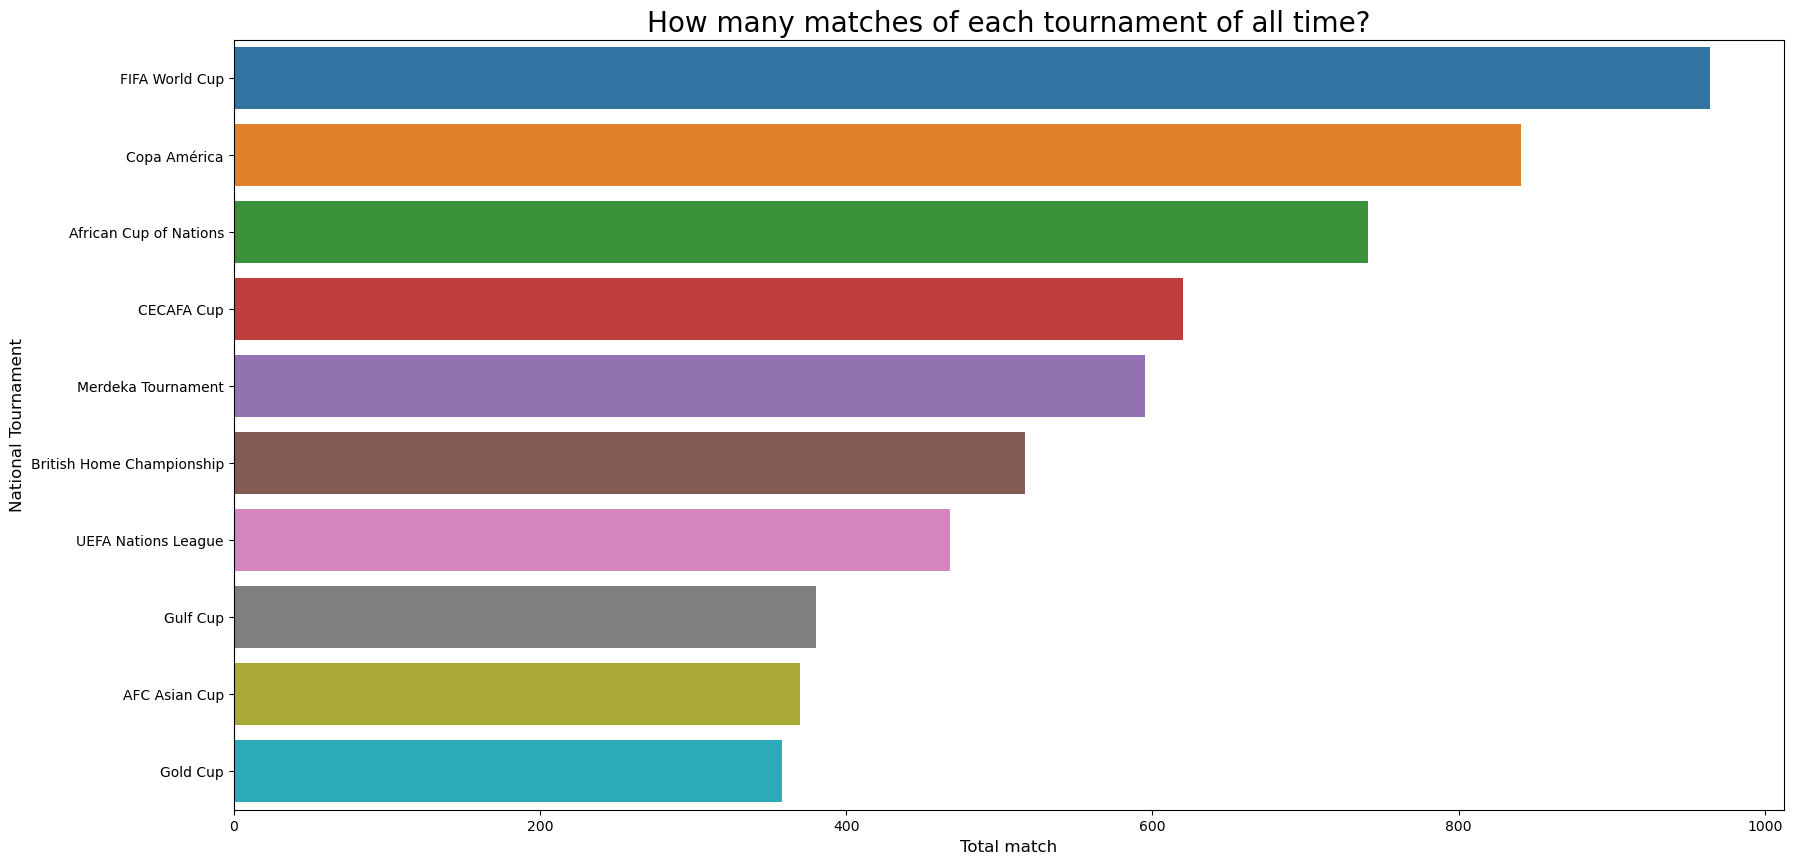

In [25]:
plt.figure(figsize=(20,10))
axs= sns.barplot(x=top10_tournament_df['Total match'], y=top10_tournament_df['tournament'], orient='h')
axs.set_title('How many matches of each tournament of all time?', size=20)
axs.set_xlabel(xlabel='Total match', size=12)
axs.set_ylabel(ylabel='National Tournament', size=12);

It was witnessed that FIFA World Cup was the biggest tournament on the planet which was established by FIFA organization(under 1000 matches during a century period between 1930 and 2022)

In [26]:
Status_team={}
Teams=list(set(list(football_df['home_team'].unique()) + list(football_df['away_team'].unique())))

Status_team= dict.fromkeys(Teams,0)
Point_df=pd.DataFrame({'Team': Status_team.keys(),'Point': Status_team.values()})
Draw_df=football_df[football_df['team winner'].isnull()]

#football_df.home_team.map(Status_team)
Point_df['Point']= Point_df['Team'].apply(lambda x : len(football_df[football_df['team winner']==x])*3 )
#Point_df.Team.isin(football_df['team winner']).astype(int)

Point_df['Point']=Point_df.apply(lambda x : x['Point']+len(Draw_df[Draw_df['home_team']==x['Team']])+len(Draw_df[Draw_df['away_team']==x['Team']]),axis=1)

Final_points_df=pd.merge(Point_df,Countries_df,how='left',on=['Team'])

Asia_ranked_top10=Final_points_df[Final_points_df['Confederation']=='AFC'].sort_values(by='Point',ascending=False).head(10)
Africa_ranked_top10=Final_points_df[Final_points_df['Confederation']=='CAF'].sort_values(by='Point',ascending=False).head(10)
Europe_ranked_top10=Final_points_df[Final_points_df['Confederation']=='UEFA'].sort_values(by='Point',ascending=False).head(10)
NCAmerica_ranked_top10=Final_points_df[Final_points_df['Confederation']=='CONCACAF'].sort_values(by='Point',ascending=False).head(10)
SAmerica_ranked_top10=Final_points_df[Final_points_df['Confederation']=='CONMEBOL'].sort_values(by='Point',ascending=False).head(10)
Oceania_ranked_top10=Final_points_df[Final_points_df['Confederation']=='OFC'].sort_values(by='Point',ascending=False).head(10)

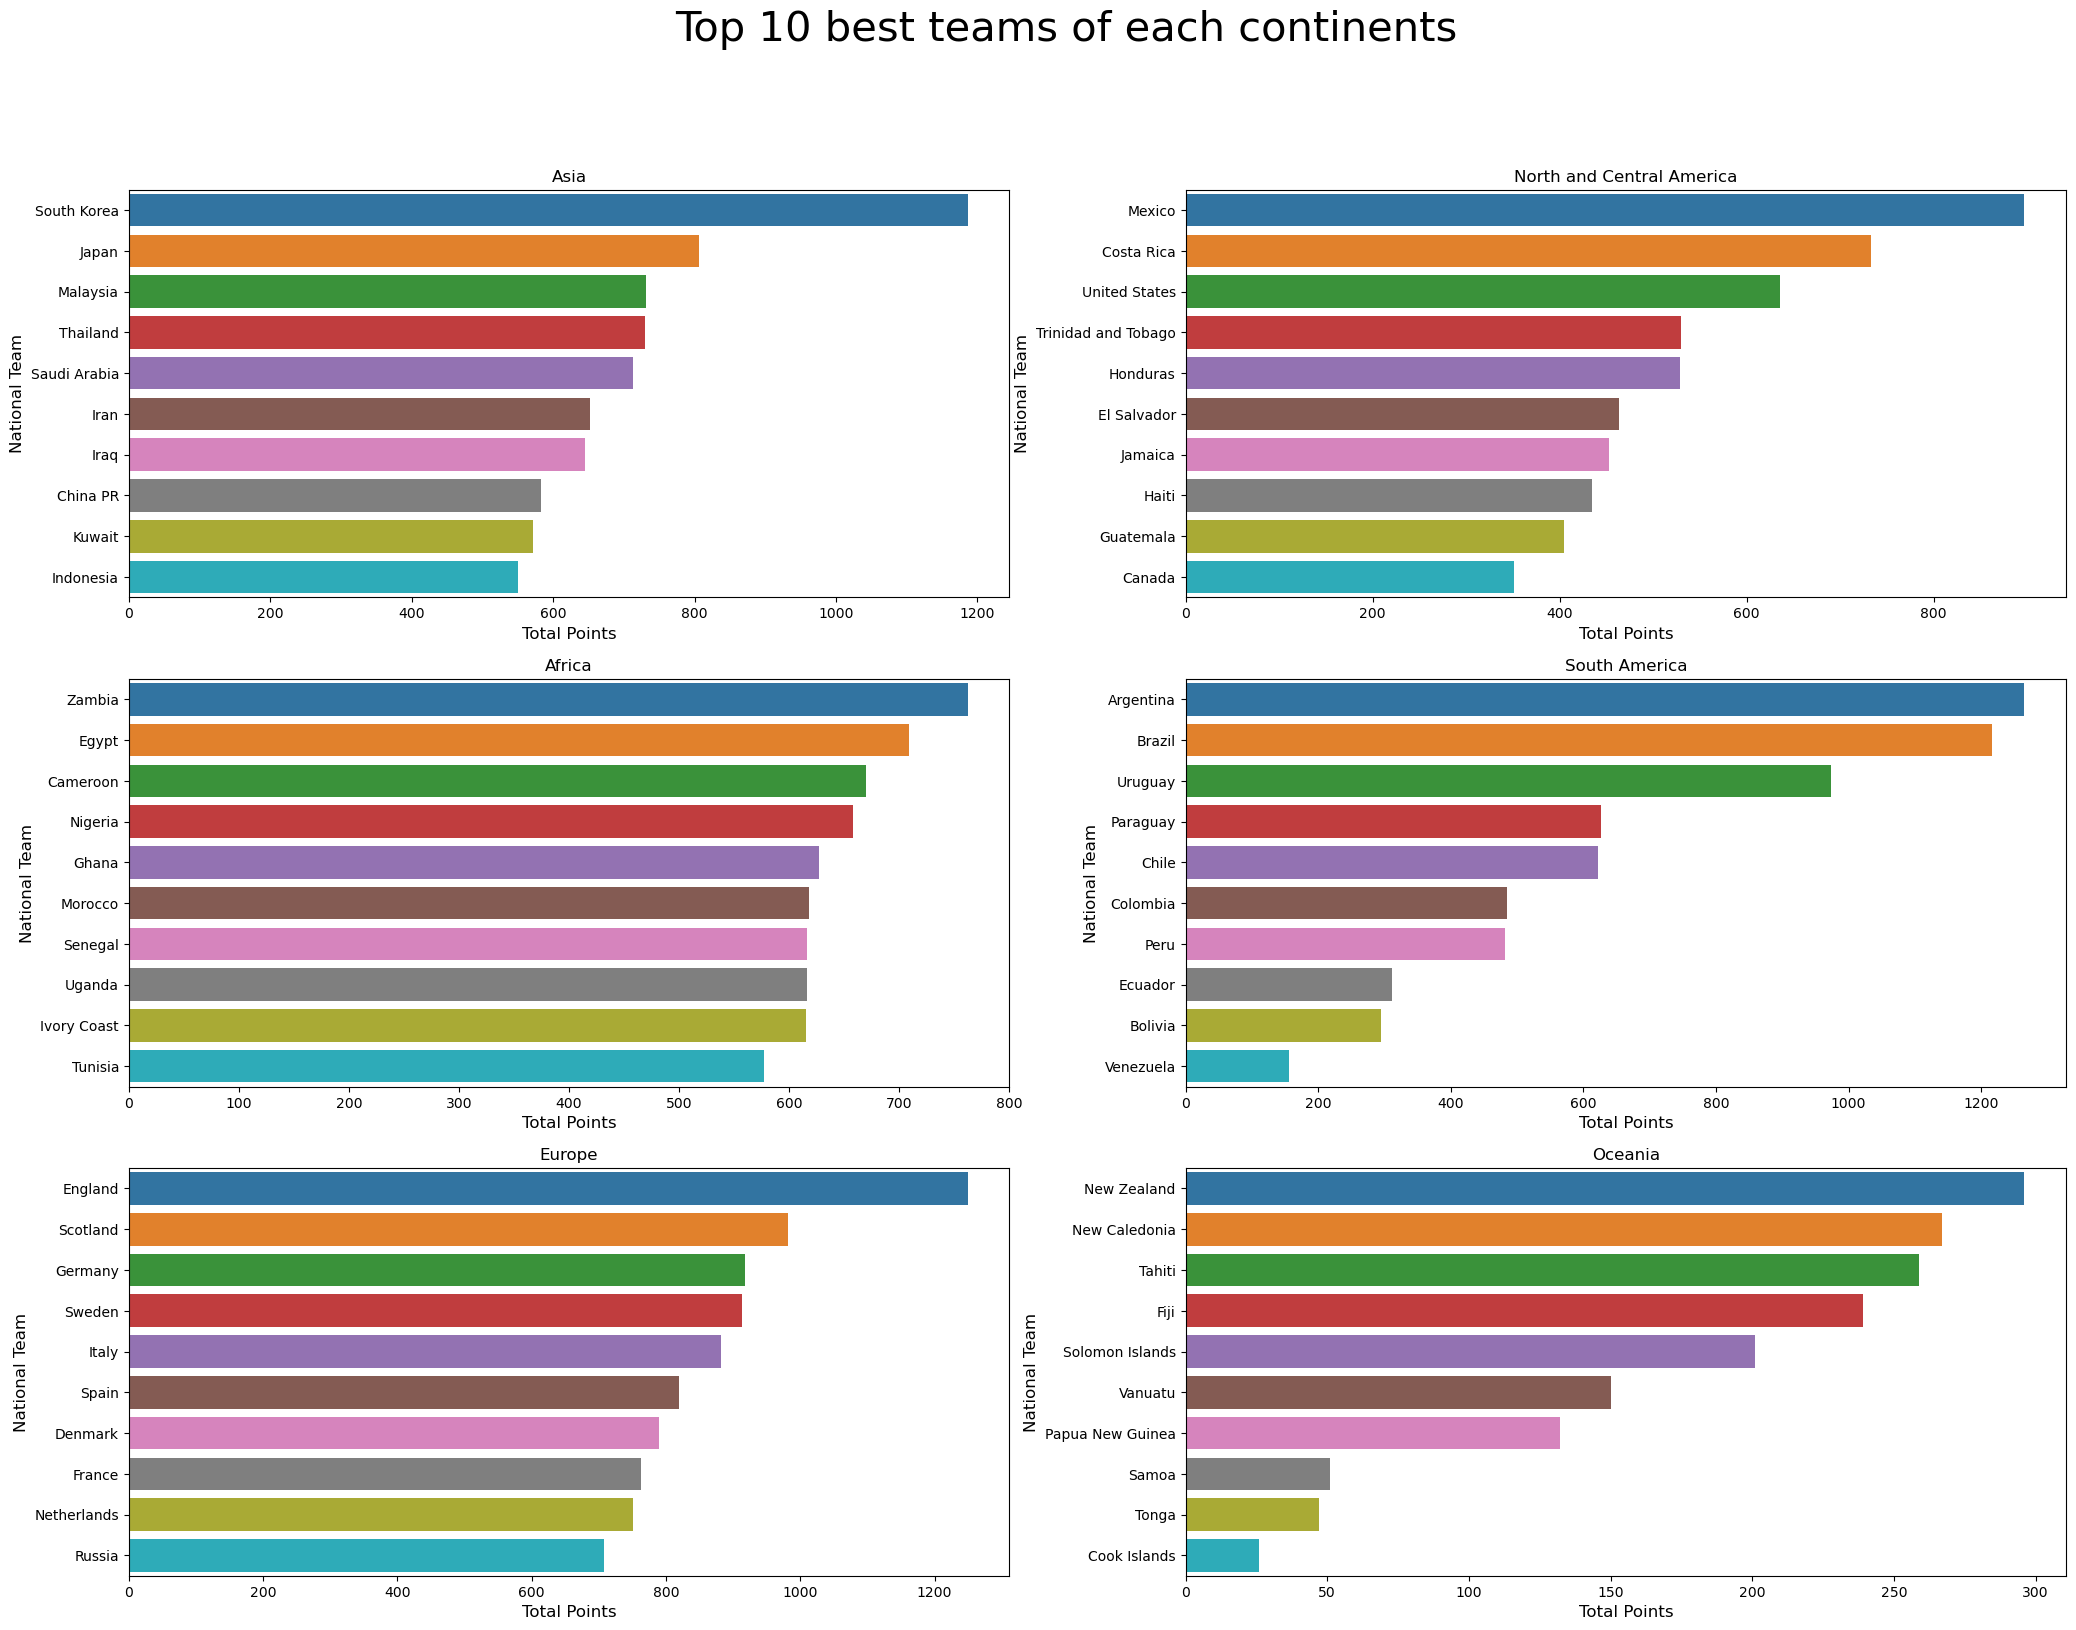

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(25, 18))
fig.suptitle('Top 10 best teams of each continents',size=30)
sns.barplot(y=Asia_ranked_top10['Team'], x=Asia_ranked_top10['Point'], orient='h',ax=axs[0][0])

sns.barplot(y=Africa_ranked_top10['Team'], x=Africa_ranked_top10['Point'], orient='h',ax=axs[1][0] )
sns.barplot(y=Europe_ranked_top10['Team'], x=Europe_ranked_top10['Point'], orient='h',ax=axs[2][0] )
sns.barplot(y=NCAmerica_ranked_top10['Team'], x=NCAmerica_ranked_top10['Point'], orient='h',ax=axs[0][1] )
sns.barplot(y=SAmerica_ranked_top10['Team'], x=SAmerica_ranked_top10['Point'], orient='h',ax=axs[1][1] )
sns.barplot(y=Oceania_ranked_top10['Team'], x=Oceania_ranked_top10['Point'], orient='h',ax=axs[2][1] )

axs[0][0].set_xlabel(xlabel='Total Points', size=12)
axs[0][0].set_ylabel(ylabel='National Team', size=12);
axs[1][0].set_xlabel(xlabel='Total Points', size=12)
axs[1][0].set_ylabel(ylabel='National Team', size=12);
axs[2][0].set_xlabel(xlabel='Total Points', size=12)
axs[2][0].set_ylabel(ylabel='National Team', size=12);
axs[0][1].set_xlabel(xlabel='Total Points', size=12)
axs[0][1].set_ylabel(ylabel='National Team', size=12);
axs[1][1].set_xlabel(xlabel='Total Points', size=12)
axs[1][1].set_ylabel(ylabel='National Team', size=12);
axs[2][1].set_xlabel(xlabel='Total Points', size=12)
axs[2][1].set_ylabel(ylabel='National Team', size=12);

axs[0][0].set_title("Asia")
axs[1][0].set_title("Africa")
axs[2][0].set_title("Europe")
axs[0][1].set_title("North and Central America")
axs[1][1].set_title("South America")
axs[2][1].set_title("Oceania");

# axs[1].set_title('Which are the best Africa teams of all time ?', size=20)
# axs[1].set_xlabel(xlabel='Total Points', size=12)
# axs[1].set_ylabel(ylabel='National Team', size=12);

## Nhận xét tại đây
- According to Asia bar chart , it is true that there are several big teams leading Asia rank like South Korea, Japan, Saudi Arabia. Noticeably, Malaysia and Thailand which are East South Asia countries ranked third and fourth of Asia rank.
- At Africa , 5 biggest teams of Africa dominated the Africa rank. (Zambia , Egypt, Cameroon, Nigeria, and Ghana)
- At Europe
- At North and Central America
- At South America
- At Ocenia

### Whether the teams dominated their own continent will gained the top rank of World Cup tournament ? To answer this question let explore more detailed about FIFA World Cup.

## Model FIFA World Cup 2022

In [28]:
import datetime
football_df = football_df[(football_df['date'].dt.year >= 2018) & (football_df['date']<=datetime.datetime(2022,10,6))]
Rank_df=pd.read_csv('fifa_ranking-2022-10-06.csv')
Rank_df["country_full"] = Rank_df["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States").str.replace("Brunei Darussalam", "Brunei")
Rank_df["country_full"] = Rank_df["country_full"].str.replace("Korea DPR", "North Korea").str.replace("Congo DR", "DR Congo").str.replace("Côte d'Ivoire", "Ivory Coast")
Rank_df=Rank_df.drop(columns=['country_abrv','previous_points','confederation','rank_change'])
football_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_status,team winner,year,decade,month,day of Week
23792,2018-01-02,Iraq,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,D,NaN,2018,2010,January,Tuesday
23793,2018-01-02,Oman,Bahrain,1,0,Gulf Cup,Kuwait City,Kuwait,True,H,Oman,2018,2010,January,Tuesday
23794,2018-01-05,Oman,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,D,NaN,2018,2010,January,Friday
23795,2018-01-13,Morocco,Mauritania,4,0,African Nations Championship,Casablanca,Morocco,False,H,Morocco,2018,2010,January,Saturday
23796,2018-01-14,Guinea,Sudan,1,2,African Nations Championship,Casablanca,Morocco,True,A,Sudan,2018,2010,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26759,2022-09-27,Norway,Serbia,0,2,UEFA Nations League,Oslo,Norway,False,A,Serbia,2022,2020,September,Tuesday
26760,2022-09-27,Sweden,Slovenia,1,1,UEFA Nations League,Stockholm,Sweden,False,D,NaN,2022,2020,September,Tuesday
26761,2022-09-27,Kosovo,Cyprus,5,1,UEFA Nations League,Pristina,Kosovo,False,H,Kosovo,2022,2020,September,Tuesday
26762,2022-09-27,Greece,Northern Ireland,3,1,UEFA Nations League,Athens,Greece,False,H,Greece,2022,2020,September,Tuesday


In [29]:
Rank_df['rank_date']=pd.to_datetime(Rank_df['rank_date'],format="%Y-%m-%d")
Rank_df

,rank,country_full,total_points,rank_date
0,1,Germany,57.00,1992-12-31
1,96,Syria,11.00,1992-12-31
2,97,Burkina Faso,11.00,1992-12-31
3,99,Latvia,10.00,1992-12-31
4,100,Burundi,10.00,1992-12-31
...,...,...,...,...
63911,74,El Salvador,1330.51,2022-10-06
63912,75,Oman,1320.29,2022-10-06
63913,76,Israel,1316.55,2022-10-06
63914,78,Georgia,1307.34,2022-10-06


In [30]:
#football_df['rank_date_home']=Rank_df.apply(lambda x: football_df[football_df['date']<x['rank_date'] &football_df['home_team']==x['country_full']]['date'],axis=1)

def find_lastly_rank_date_home(x:pd.Series):
    try:
        return Rank_df[(Rank_df['country_full']==x['home_team']) & (Rank_df['rank_date']<x['date'])]['rank_date'].tolist()[-1]
    except:
        return np.nan
    
def find_lastly_rank_date_away(x:pd.Series):
    try:
        return Rank_df[(Rank_df['country_full']==x['away_team']) & (Rank_df['rank_date']<x['date'])]['rank_date'].tolist()[-1]
    except:
        return np.nan
    
football_df['rank_date_home']=football_df.apply(lambda x: find_lastly_rank_date_home(x),axis=1)
football_df['rank_date_away']=football_df.apply(lambda x: find_lastly_rank_date_away(x),axis=1)
football_df.dropna(inplace=True)

In [31]:
football_df= football_df.merge(Rank_df,left_on=['rank_date_home', 'home_team'], right_on=['rank_date', 'country_full'])
football_df = football_df.merge(Rank_df, 
                         left_on=['rank_date_away', 'away_team'], 
                         right_on=['rank_date', 'country_full'], 
                         suffixes=('_home', '_away'))

football_df = football_df.loc[:,~football_df.columns.duplicated()].copy()
football_df.drop(columns=['country_full_away','country_full_home'],inplace=True)
football_df['rank_difference'] = football_df['rank_home'] - football_df['rank_away']
football_df['average_rank'] = (football_df['rank_home'] + football_df['rank_away'])/2
football_df['point_difference'] = football_df['total_points_home'] - football_df['total_points_away']
football_df['score_difference'] = football_df['home_score'] - football_df['away_score'] # Note that this feature is not used in training
football_df['is_won'] = football_df['score_difference'] > 0 

football_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_status,...,rank_date_away,rank_home,total_points_home,rank_away,total_points_away,rank_difference,average_rank,point_difference,score_difference,is_won
0,2018-01-02,Oman,Bahrain,1,0,Gulf Cup,Kuwait City,Kuwait,True,H,...,2017-12-21,101,351.00,115,282.00,-14,108.0,69.00,1,True
1,2018-01-13,Morocco,Mauritania,4,0,African Nations Championship,Casablanca,Morocco,False,H,...,2017-12-21,40,738.00,99,354.00,-59,69.5,384.00,4,True
2,2018-01-17,Sudan,Mauritania,1,0,African Nations Championship,Casablanca,Morocco,True,H,...,2017-12-21,136,221.00,99,354.00,37,117.5,-133.00,1,True
3,2018-01-17,Morocco,Guinea,3,1,African Nations Championship,Casablanca,Morocco,False,H,...,2017-12-21,40,738.00,65,532.00,-25,52.5,206.00,2,True
4,2018-01-14,Guinea,Sudan,1,2,African Nations Championship,Casablanca,Morocco,True,A,...,2017-12-21,65,532.00,136,221.00,-71,100.5,311.00,-1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2022-09-27,Switzerland,Czech Republic,2,1,UEFA Nations League,St. Gallen,Switzerland,False,H,...,2022-08-25,16,1621.43,32,1502.90,-16,24.0,118.53,1,True
2124,2022-09-27,Republic of Ireland,Armenia,3,2,UEFA Nations League,Dublin,Republic of Ireland,False,H,...,2022-08-25,47,1442.48,92,1242.42,-45,69.5,200.06,1,True
2125,2022-09-27,Norway,Serbia,0,2,UEFA Nations League,Oslo,Norway,False,A,...,2022-08-25,36,1488.57,25,1549.53,11,30.5,-60.96,-2,False
2126,2022-09-27,Kosovo,Cyprus,5,1,UEFA Nations League,Pristina,Kosovo,False,H,...,2022-08-25,106,1183.90,108,1180.52,-2,107.0,3.38,4,True


In [32]:
#football_df=football_df[~football_df['team winner'].isnull()]
#football_df.isnull().values.any()

In [33]:
# Rank_df_home=Rank_df.rename(columns={'country_full':'home_team','rank':'rank_home','total_points':'total_points_home'})
# Rank_df_home['rank_date']=pd.to_datetime(Rank_df_home['rank_date'],format="%Y-%m-%d")
# #Rank_df_home
# Rank_df_away=Rank_df.rename(columns={'country_full':'away_team','rank':'rank_away','total_points':'total_points_away'})
# Rank_df_away['rank_date']=pd.to_datetime(Rank_df_away['rank_date'],format="%Y-%m-%d")
# Rank_df_away[Rank_df_away['away_team']=='Cook Islands']

In [34]:
# football_df=football_df.merge(Rank_df_home,how='left',on=['rank_date','home_team'])
# football_df=football_df.merge(Rank_df_away,how='left',on=['rank_date','away_team'])



# football_df

In [35]:
# football_df=football_df[(~football_df['rank_home'].isnull())]
# football_df=football_df[~football_df['rank_away'].isnull()]
# football_df=football_df[~football_df['team winner'].isnull()]

# football_df=football_df.reset_index(drop='True')


In [36]:
X,y=football_df.loc[:,['average_rank','rank_difference','point_difference']],football_df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
y.isnull().values.any()

False

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, y_train) * 100, 2)
acc_log

76.97

In [39]:
model.score(X_test,y_test)

0.7417840375586855

In [54]:
Group_WC={'A': ['Netherlands','Qatar','Ecuador','Senegal'],
          'B': ['England','United States','Iran','Wales'],
          'C': ['Argentina','Poland','Mexico','Saudi Arabia'],
          'D': ['France', 'Australia','Tunisia','Denmark'],
          'E': ['Japan', 'Spain','Germany','Costa Rica'],
          'F': ['Morocco','Croatia','Belgium','Canada'],
          'G': ['Brazil','Switzerland','Cameroon','Serbia'],
          'H': ['Portugal','South Korea','Uruguay','Ghana']}
World_cup_df=pd.DataFrame({'Group': Group_WC.keys(),'Team': Group_WC.values()})
World_cup_df=World_cup_df.explode('Team').reset_index(drop=True)
World_cup_df['date']=datetime.datetime(2022,11,20)
World_cup_df


,Group,Team,date
0,A,Netherlands,2022-11-20
1,A,Qatar,2022-11-20
2,A,Ecuador,2022-11-20
3,A,Senegal,2022-11-20
4,B,England,2022-11-20
5,B,United States,2022-11-20
6,B,Iran,2022-11-20
7,B,Wales,2022-11-20
8,C,Argentina,2022-11-20
9,C,Poland,2022-11-20


In [55]:
World_cup_rank_df=Rank_df.loc[(Rank_df['rank_date']==Rank_df['rank_date'].max()) & (Rank_df['country_full'].isin(World_cup_df['Team'].unique()))].reset_index(drop='True')
World_cup_rank_df

,rank,country_full,total_points,rank_date
0,1,Brazil,1841.30,2022-10-06
1,28,South Korea,1530.30,2022-10-06
2,30,Tunisia,1507.54,2022-10-06
3,31,Costa Rica,1503.59,2022-10-06
4,38,Australia,1488.72,2022-10-06
5,41,Canada,1475.00,2022-10-06
6,43,Cameroon,1471.44,2022-10-06
7,44,Ecuador,1464.39,2022-10-06
8,26,Poland,1548.59,2022-10-06
9,24,Japan,1559.54,2022-10-06


In [56]:
# Group
from itertools import combinations
World_cup_df['total_prob']=0
World_cup_df['points']=0

World_cup_df['Match_1']=0
World_cup_df['Match_2']=0
World_cup_df['Match_3']=0

def Find_match(Team,pros):
    if (World_cup_df.loc[Team,'Match_1'].values[0]==0):
        World_cup_df.loc[Team,'Match_1']=pros
    elif (World_cup_df.loc[Team,'Match_2'].values[0]==0):
        World_cup_df.loc[Team,'Match_2']=pros
    elif (World_cup_df.loc[Team,'Match_3'].values[0]==0): 
        World_cup_df.loc[Team,'Match_3']=pros

for group in list(World_cup_df['Group'].unique()):
    for home , away in  combinations(World_cup_df[World_cup_df['Group']==group]['Team'],2):
        Distance_rank=pd.DataFrame(np.array([[np.nan, np.nan, np.nan]]),columns=X.columns)
        Distance_rank['average_rank']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['rank'].values[0]+World_cup_rank_df[World_cup_rank_df['country_full']==away]['rank'].values[0])/2
        Distance_rank['rank_difference']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['rank'].values[0]-World_cup_rank_df[World_cup_rank_df['country_full']==away]['rank'].values[0])
        Distance_rank['point_difference']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['total_points'].values[0]-World_cup_rank_df[World_cup_rank_df['country_full']==away]['total_points'].values[0])
        
        home_win_prob = model.predict_proba(Distance_rank)[:,1][0]
        World_cup_df.loc[World_cup_df[World_cup_df['Team']==home].index,'total_prob'] += home_win_prob
        World_cup_df.loc[World_cup_df[World_cup_df['Team']==away].index,'total_prob'] += 1-home_win_prob
        
        points=0;
        if home_win_prob< 0.45:
            Find_match(World_cup_df[World_cup_df['Team']==home].index,home_win_prob)
            Find_match(World_cup_df[World_cup_df['Team']==away].index,1-home_win_prob)
            World_cup_df.loc[World_cup_df[World_cup_df['Team']==away].index,'points']  += 3
        if home_win_prob >= 0.45:
            points=1
        if home_win_prob >= 0.55:
            points=3
            Find_match(World_cup_df[World_cup_df['Team']==home].index,home_win_prob)
            Find_match(World_cup_df[World_cup_df['Team']==away].index,1-home_win_prob)
            World_cup_df.loc[World_cup_df[World_cup_df['Team']==home].index,'points']  += 3
        if points==1:
            Find_match(World_cup_df[World_cup_df['Team']==home].index,home_win_prob)
            Find_match(World_cup_df[World_cup_df['Team']==away].index,1-home_win_prob)
            World_cup_df.loc[World_cup_df[World_cup_df['Team']==home].index,'points']  += 1
            World_cup_df.loc[World_cup_df[World_cup_df['Team']==away].index,'points']  += 1

In [57]:
#Find_match(World_cup_df[World_cup_df['Team']=='Qatar'].index,0.6)
#World_cup_df.loc[World_cup_df[World_cup_df['Team']=='Qatar'].index,'Match_1']=0.6

World_cup_df

,Group,Team,date,total_prob,points,Match_1,Match_2,Match_3
0,A,Netherlands,2022-11-20,2.310501,9,0.838026,0.812280,0.660195
1,A,Qatar,2022-11-20,1.038160,1,0.161974,0.535294,0.340892
2,A,Ecuador,2022-11-20,1.031654,1,0.187720,0.464706,0.379228
3,A,Senegal,2022-11-20,1.619685,6,0.339805,0.659108,0.620772
4,B,England,2022-11-20,2.062805,9,0.659866,0.704812,0.698126
5,B,United States,2022-11-20,1.557834,6,0.340134,0.612652,0.605048
6,B,Iran,2022-11-20,1.239061,3,0.295188,0.387348,0.556525
7,B,Wales,2022-11-20,1.140300,0,0.301874,0.394952,0.443475
8,C,Argentina,2022-11-20,2.299313,9,0.761192,0.665930,0.872192
9,C,Poland,2022-11-20,1.426825,4,0.238808,0.450620,0.737396


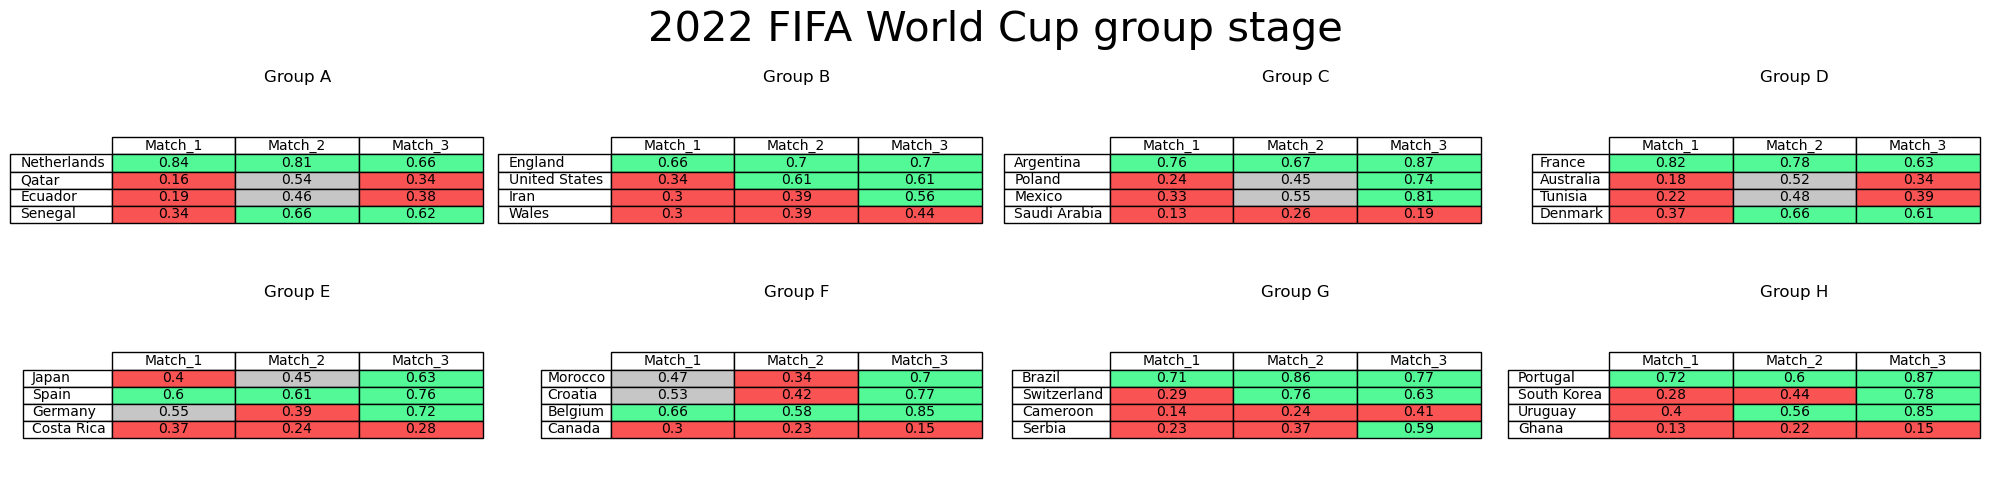

In [58]:
from matplotlib import colors
from matplotlib.colors import ListedColormap


# define figure and axes
fig, ax = plt.subplots(2,4,figsize=(20, 5))

# hide the axes
fig.patch.set_visible(False)

fig.suptitle('2022 FIFA World Cup group stage',size=30)



#Colors
red_green = ListedColormap(['#F95353','#C6C6C6', '#53F996'])
bounds = [0,0.45, 0.56, 1]
norm = colors.BoundaryNorm(bounds, red_green.N)

group=['A','B','C','D','E','F','G','H']
df = [World_cup_df[World_cup_df['Group']==i][['Team','Match_1','Match_2','Match_3']].set_index('Team').round(2) for i in group]
for i in range(8):
    
    # df = World_cup_df[World_cup_df['Group']==group[i]][['Team','Match_1','Match_2','Match_3']].set_index('Team').round(2)

    ax[i//4][i%4].table(
    cellText=df[i].values,
    colLabels=df[i].columns,
    rowLabels=df[i].index,
    loc='center',
    cellLoc='center',
    cellColours=red_green(norm(df[i].values))
    )
    ax[i//4][i%4].axis('off')
    ax[i//4][i%4].axis('tight')
    ax[i//4][i%4].set_title('Group '+group[i])


fig.tight_layout()
plt.show()

In [60]:
World_cup_df=World_cup_df.sort_values(by=['Group','total_prob','points'],ascending=False)
Next_round_WC=World_cup_df.groupby('Group').nth([0,1])
Next_round_WC=Next_round_WC.reset_index()
Next_round_WC=Next_round_WC.set_index('Team')
Next_round_WC

,Group,date,total_prob,points,Match_1,Match_2,Match_3
Team,,,,,,,
Netherlands,A,2022-11-20,2.310501,9,0.838026,0.812280,0.660195
Senegal,A,2022-11-20,1.619685,6,0.339805,0.659108,0.620772
England,B,2022-11-20,2.062805,9,0.659866,0.704812,0.698126
United States,B,2022-11-20,1.557834,6,0.340134,0.612652,0.605048
Argentina,C,2022-11-20,2.299313,9,0.761192,0.665930,0.872192
Mexico,C,2022-11-20,1.697324,4,0.334070,0.549380,0.813874
France,D,2022-11-20,2.229188,9,0.816159,0.782206,0.630824
Denmark,D,2022-11-20,1.642066,6,0.369176,0.659059,0.613830
Spain,E,2022-11-20,1.970678,9,0.599463,0.609260,0.761955


In [62]:
sixteen_df_A = pd.DataFrame(columns=['home','away','winner','win_prob'])
sixteen_df_B = pd.DataFrame(columns=['home','away','winner','win_prob'])

def predict_(home,away):
    
    Distance_rank=pd.DataFrame(np.array([[np.nan, np.nan, np.nan]]),columns=X.columns)
    Distance_rank['average_rank']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['rank'].values[0]+World_cup_rank_df[World_cup_rank_df['country_full']==away]['rank'].values[0])/2
    Distance_rank['rank_difference']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['rank'].values[0]-World_cup_rank_df[World_cup_rank_df['country_full']==away]['rank'].values[0])
    Distance_rank['point_difference']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['total_points'].values[0]-World_cup_rank_df[World_cup_rank_df['country_full']==away]['total_points'].values[0])

    home_win_prob = model.predict_proba(Distance_rank)[:,1][0]
    if home_win_prob< 0.5:
        winner=away
        win_prob=1-home_win_prob
    if home_win_prob >= 0.5:
        winner=home
        win_prob=home_win_prob
    return pd.DataFrame({'home': [home], 'away': [away],'winner': [winner],'win_prob': [win_prob]})

for i in range (0,15,4):
    home_A=Next_round_WC.index[i]
    away_A=Next_round_WC.index[i+3]
    
    home_B=Next_round_WC.index[i+1]
    away_B=Next_round_WC.index[i+2]

    sixteen_df_A=sixteen_df_A.append(predict_(home_A,away_A),ignore_index = True)
    sixteen_df_B=sixteen_df_B.append(predict_(home_B,away_B),ignore_index = True)

sixteen_df_A=sixteen_df_A.set_index('winner')
sixteen_df_B=sixteen_df_B.set_index('winner')
Next_round_df=pd.concat([sixteen_df_A, sixteen_df_B])
Next_round_df
    
sixteen_df_A

,home,away,winner,win_prob
0,Netherlands,United States,Netherlands,0.631387
1,Argentina,Denmark,Argentina,0.641653
2,Spain,Croatia,Spain,0.616546
3,Brazil,Uruguay,Brazil,0.709253


In [63]:
sixteen_df_B

,home,away,winner,win_prob
0,Senegal,England,England,0.575744
1,Mexico,France,France,0.542871
2,Germany,Belgium,Belgium,0.568101
3,Switzerland,Portugal,Switzerland,0.509850


In [64]:
sixteen_df_A=sixteen_df_A.set_index('winner')
sixteen_df_B=sixteen_df_B.set_index('winner')
Next_round_df=pd.concat([sixteen_df_A, sixteen_df_B])
Next_round_df

,home,away,win_prob
winner,,,
Netherlands,Netherlands,United States,0.631387
Argentina,Argentina,Denmark,0.641653
Spain,Spain,Croatia,0.616546
Brazil,Brazil,Uruguay,0.709253
England,Senegal,England,0.575744
France,Mexico,France,0.542871
Belgium,Germany,Belgium,0.568101
Switzerland,Switzerland,Portugal,0.509850


In [65]:

Quater_df = pd.DataFrame(columns=['home','away','winner','win_prob'])
Bk_df = pd.DataFrame(columns=['home','away','winner','win_prob'])
Final_df = pd.DataFrame(columns=['home','away','winner','win_prob'])
for f in range(3):
    #print(f)
    winner=[]
    for i in range(int(Next_round_df.shape[0]/2)):
        home=Next_round_df.index[i*2]
        away=Next_round_df.index[i*2+1]
        if(f==0):
            Quater_df=Quater_df.append(predict_(home,away),ignore_index = True)
            winner=Quater_df['winner'].tolist()
        elif(f==1):
            Bk_df=Bk_df.append(predict_(home,away),ignore_index=True)
            winner=Bk_df['winner'].tolist()
        elif(f==2):
            Final_df=Final_df.append(predict_(home,away),ignore_index=True)
    Next_round_df=Next_round_df.loc[winner]
Quater_df

,home,away,winner,win_prob
0,Netherlands,Argentina,Argentina,0.506617
1,Spain,Brazil,Brazil,0.534778
2,England,France,England,0.536655
3,Belgium,Switzerland,Belgium,0.701060


In [66]:
Quater_df

,home,away,winner,win_prob
0,Netherlands,Argentina,Argentina,0.506617
1,Spain,Brazil,Brazil,0.534778
2,England,France,England,0.536655
3,Belgium,Switzerland,Belgium,0.701060


In [67]:
Bk_df

,home,away,winner,win_prob
0,Argentina,Brazil,Argentina,0.51303
1,England,Belgium,Belgium,0.50135


In [53]:
Final_df

,home,away,winner,win_prob
0,Argentina,Belgium,Argentina,0.53019
